In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating mock data to fit linear regression for classification (w.x1+ x0)

In [39]:
x_label0 = np.random.normal(5,1,10)
x_label1 = np.random.normal(2,1,10)
## Outlier:
x_label0 = np.append(np.random.normal(5,1,9),20)
xs = np.append(x_label0, x_label1)
labels = [0.]*len(x_label0)+[1.]*len(x_label1)

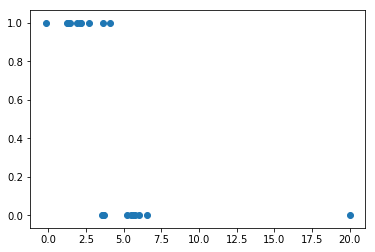

In [40]:
plt.scatter(xs, labels)

### Setting hyperparameters:

In [41]:
learning_rate = 0.0001
training_epochs = 5000

### Creating tf variables and model:

In [42]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X,0)))
w = tf.Variable([0., 0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y - y_model))
train_opt = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

### Creationg tf session and executing the graph:

In [43]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for epoch in range(training_epochs):
    sess.run(train_opt, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch%500 == 0:
        print (epoch, current_cost)
w_val = sess.run(w)
print ("Learned parameter: ", w_val)


0 9.80472
500 4.3675
1000 3.58364
1500 3.45958
2000 3.43994
2500 3.43683
3000 3.43634
3500 3.43626
4000 3.43625
4500 3.43625
Learned parameter:  [ 0.79832172 -0.06917865]


### Plotting decision boundary:

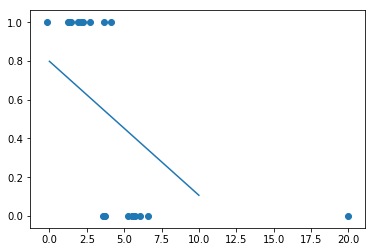

In [44]:
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs*w_val[1]+w_val[0])
plt.scatter(xs, labels)

#### Introducing an outlier greatly affects the classification boundary when we use linear regression for classification. Hence, a stupid thing to do. Never use it.

### Printing performance metrics:

In [45]:
correct_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))
print('Accuracy: ', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

Accuracy:  0.85


In [46]:
sess.close()